In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_true = pd.read_csv('true.csv')
df_fake = pd.read_csv('fake.csv')

df_true['class'] = 0; df_fake['class'] = 1
df = pd.concat([df_fake, df_true])
#concatenation to 44898 rows
print(df)

#setting max feautures to 50
X = TfidfVectorizer(stop_words='english', max_features=50
).fit_transform(df['title'])


                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

1) Building the models before hyperparemterization to see the results with their respective ROC plots.

0        1
1        1
2        1
3        1
4        1
        ..
21412    0
21413    0
21414    0
21415    0
21416    0
Name: class, Length: 44898, dtype: int64
roc_auc_score for DecisionTree:  0.8793027504040574
roc_auc_score for Random Forest:  0.8886750318705481
roc_auc_score for Neural Network:  0.8896545460766517


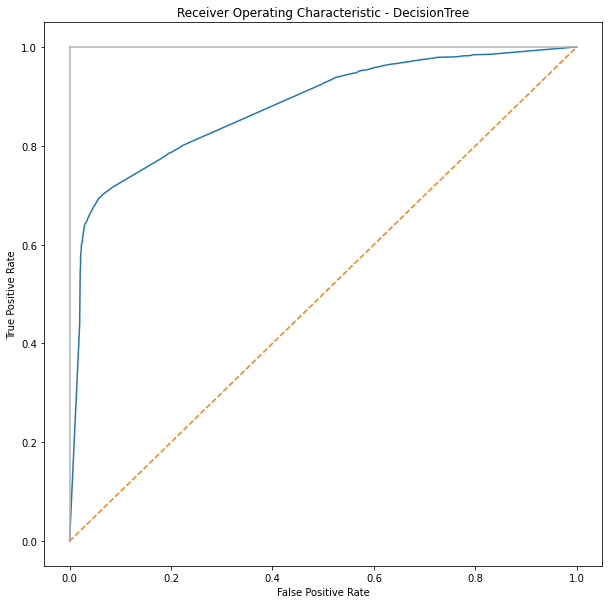

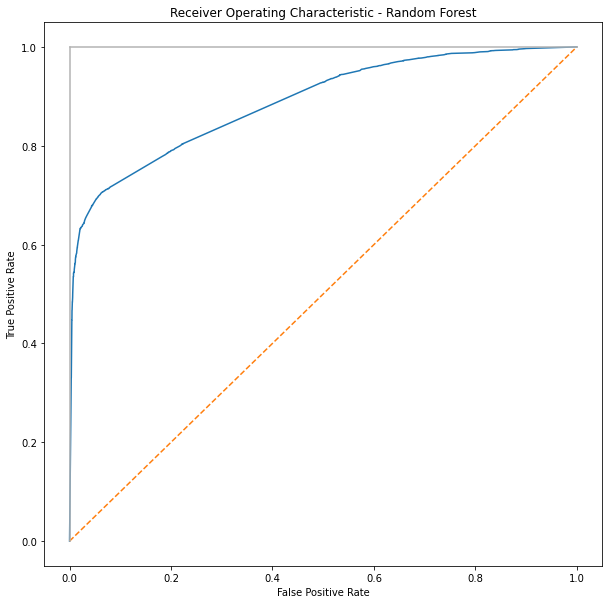

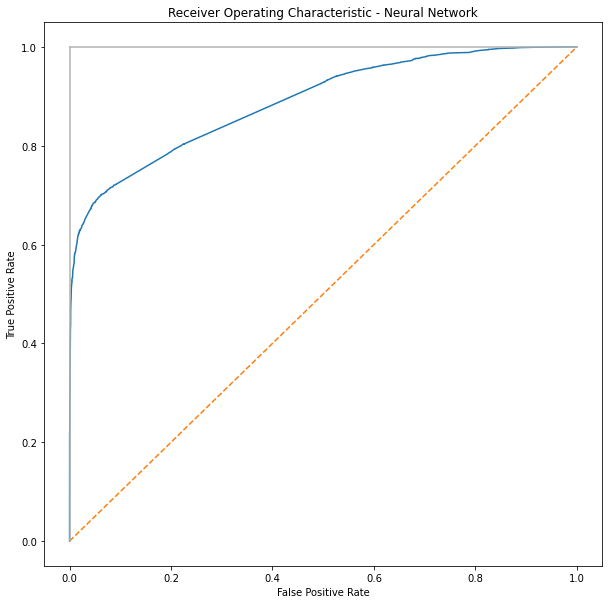

In [2]:
#target variable
y = df['class']

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_tree = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_nn = MLPClassifier()

clf_tree.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_nn.fit(X_train, y_train)

y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_rf.predict_proba(X_test)[:,1]
y_score3 = clf_nn.predict_proba(X_test)[:,1]
    
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Neural Network: ', roc_auc_score(y_test, y_score3))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Neural Network')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [3]:
#Applying hyper parameters to each model TWICE

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid 
param_dist_tree = {"max_depth": randint(3, 12),
                    "max_features": randint(3, 20)}
    
param_dist_rf = {"max_depth": randint(3, 12),
                  "max_features": randint(3, 20),
                  "n_estimators": randint(20,100)}
    
param_dist_nn = {"hidden_layer_sizes": randint(1,10),
                  "learning_rate":('constant','invscaling','adaptive')}
  
# creating the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(clf_tree, param_dist_tree, cv = 5)
forest_cv = RandomizedSearchCV(clf_rf, param_dist_rf, cv = 5)
#nn_cv = RandomizedSearchCV(clf_nn, param_dist_nn, cv = 20)
  
tree_cv.fit(X_train, y_train)
forest_cv.fit(X_train, y_train)
#nn_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

print("Tuned Random Forest Parameters: {}".format(forest_cv.best_params_))
print("Best score is {}".format(forest_cv.best_score_))

#print("Tuned Neural Network Parameters: {}".format(nn_cv.best_params_))
#print("Best score is {}".format(nn_cv.best_score_))


Tuned Decision Tree Parameters: {'max_depth': 11, 'max_features': 13}
Best score is 0.7729416710898763
Tuned Random Forest Parameters: {'max_depth': 11, 'max_features': 5, 'n_estimators': 55}
Best score is 0.8055237902869606


First Hyper parameters tunes -->

Tuned Decision Tree Parameters: {'max_depth': 11, 'max_features': 17}
Best score is 0.7757732793653416
Tuned Random Forest Parameters: {'max_depth': 11, 'max_features': 10, 'n_estimators': 23}
Best score is 0.7985551576522953


Second Hyper parameters tunes -->

Tuned Decision Tree Parameters: {'max_depth': 9, 'max_features': 16}
Best score is 0.7660682842325421
Tuned Random Forest Parameters: {'max_depth': 11, 'max_features': 7, 'n_estimators': 46}
Best score is 0.8043145822148752

In [4]:
#Applying hyper parameters to Neural Network model TWICE
#This had to be done MANUALLY testing this code for 50+ tests
#This takes a while to run be cautious
#Takes too long to process hyperparameterization

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#code used to find params
print(clf_nn.get_params().keys())

# Creating the hyperparameter grid 
    
param_dist_nn = {"hidden_layer_sizes": randint(1,10),
                  "learning_rate":('constant','invscaling','adaptive')}
  
# creating the RandomizedSearchCV object
nn_cv = RandomizedSearchCV(clf_nn, param_dist_nn, cv = 2)
  
nn_cv.fit(X_train, y_train)

print("Tuned Neural Network Parameters: {}".format(nn_cv.best_params_))
print("Best score is {}".format(nn_cv.best_score_))

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Tuned Neural Network Parameters: {'hidden_layer_sizes': 8, 'learning_rate': 'invscaling'}
Best score is 0.816469390352552


First Hyper parameters tunes -->

Tuned Neural Network Parameters: {'hidden_layer_sizes': 8, 'learning_rate': 'constant'}
Best score is 0.8142738958890161

Second Hyper parameters tunes -->

Tuned Neural Network Parameters: {'hidden_layer_sizes': 7, 'learning_rate': 'adaptive'}
Best score is 0.8146239022527682

2) The behavior expected between Pd - Pf interaction of a ROC plot was an inverse relationship. The expected behavior was as the TPR was increased the false positive rate decreases and vice versa. After modeling the ROC, we see that the relationship between TPR and FPR converges at 1 at the start and end of the curve. An important part of the ROC is the area under the curve AUC which will tell us the model's accuracy for both true and false tests. As the model's accuracy increases, the AUC increases. After hyper parameterization the behavior would be to increase the curvature and the area under the curve AUC.

roc_auc_score for DecisionTree:  0.8126524126556574
roc_auc_score for Random Forest:  0.8708004217495183
roc_auc_score for Neural Network:  0.8847590735002553


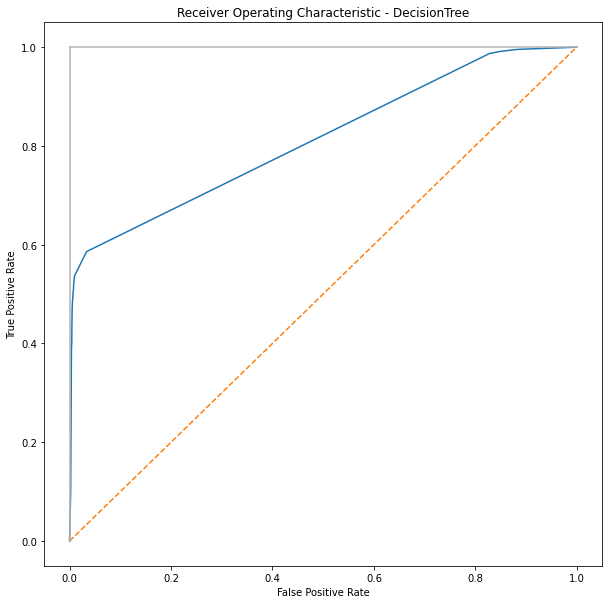

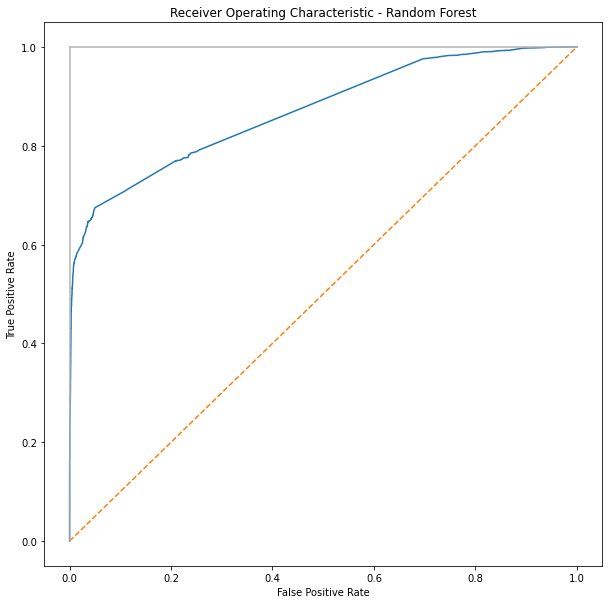

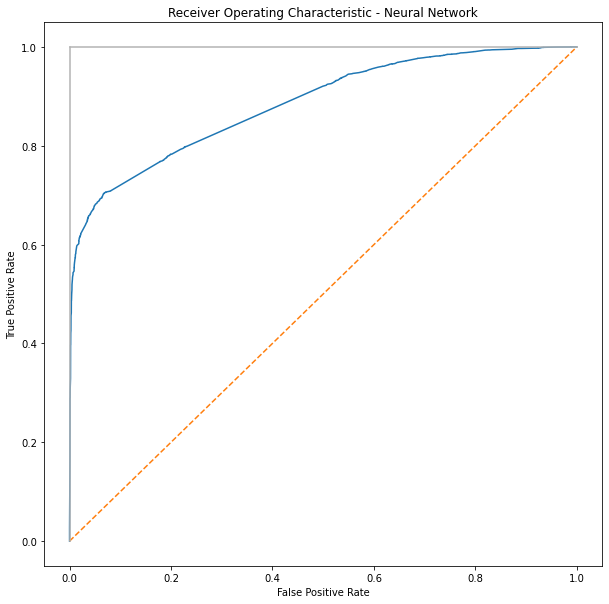

In [5]:
#Running the First Hyper parameters tunes and seeing the ROC
clf_tree_1 = DecisionTreeClassifier(max_depth=11, max_features=17)
clf_rf_1 = RandomForestClassifier(max_depth=11, max_features=10, n_estimators=23)
clf_nn_1 = MLPClassifier(hidden_layer_sizes=8, learning_rate='constant')

clf_tree_1.fit(X_train, y_train)
clf_rf_1.fit(X_train, y_train)
clf_nn_1.fit(X_train, y_train)

y_score1 = clf_tree_1.predict_proba(X_test)[:,1]
y_score2 = clf_rf_1.predict_proba(X_test)[:,1]
y_score3 = clf_nn_1.predict_proba(X_test)[:,1]
    
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Neural Network: ', roc_auc_score(y_test, y_score3))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Neural Network')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


roc_auc_score for DecisionTree:  0.8018254054804242
roc_auc_score for Random Forest:  0.8757659164266126
roc_auc_score for Neural Network:  0.8841218723839042


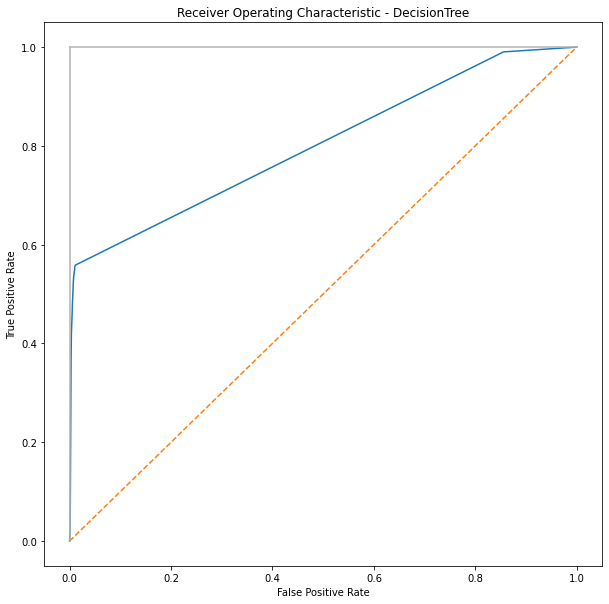

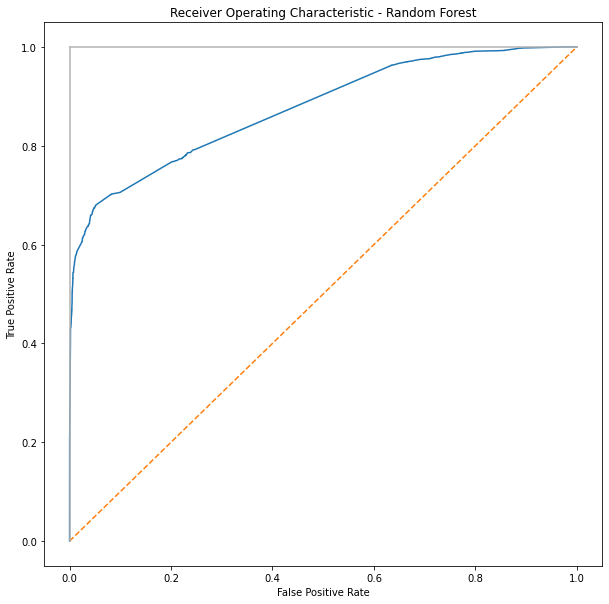

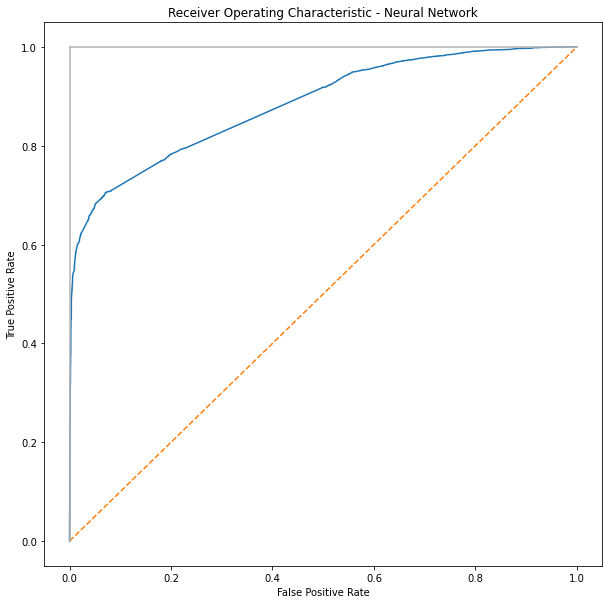

In [6]:
#Running the Second Hyper parameters tunes and seeing the ROC
clf_tree_2 = DecisionTreeClassifier(max_depth=9, max_features=16)
clf_rf_2 = RandomForestClassifier(max_depth=11, max_features=7, n_estimators=46)
clf_nn_2 = MLPClassifier(hidden_layer_sizes=7, learning_rate='adaptive')

clf_tree_2.fit(X_train, y_train)
clf_rf_2.fit(X_train, y_train)
clf_nn_2.fit(X_train, y_train)

y_score1 = clf_tree_2.predict_proba(X_test)[:,1]
y_score2 = clf_rf_2.predict_proba(X_test)[:,1]
y_score3 = clf_nn_2.predict_proba(X_test)[:,1]
    
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Neural Network: ', roc_auc_score(y_test, y_score3))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Neural Network')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


3) The ROC curves showed the relationship between TPR and FPR for the three ML algorithms used for model building for my tuned params 1 and 2. The confirmed most optimal results were obtained by the Neural Network model with the AUC of 0.89 for the first tuned params and 0.89 for the second tuned params. Please see all the models built and respective AUC calculated above.

In [7]:
#4) Adding in the new feauture of full text
#setting max feautures to 50
df['news'] = df['title'] + df['text']
X = TfidfVectorizer(stop_words='english', max_features=50
).fit_transform(df['news'])

print(X)

  (0, 8)	0.04767620511186187
  (0, 30)	0.053320705697794644
  (0, 44)	0.05715630862477825
  (0, 37)	0.04919382114908905
  (0, 49)	0.14724554957192665
  (0, 25)	0.07486972545279419
  (0, 18)	0.04925191537985967
  (0, 3)	0.051846510560898215
  (0, 17)	0.08898002407010286
  (0, 2)	0.16453000605462093
  (0, 29)	0.09995326580978965
  (0, 6)	0.09614511680930243
  (0, 19)	0.16458932484415778
  (0, 22)	0.1432583046398542
  (0, 15)	0.16852056722647585
  (0, 48)	0.7007225715634149
  (0, 21)	0.4970633341245867
  (0, 43)	0.274009115966143
  (0, 9)	0.11574763462652747
  (1, 40)	0.12174292574184804
  (1, 36)	0.07209702812731496
  (1, 10)	0.13673683423776337
  (1, 1)	0.1526601628470003
  (1, 5)	0.30592992311754036
  (1, 13)	0.3026182015375628
  :	:
  (44895, 12)	0.15870763345397645
  (44895, 39)	0.45051717507675315
  (44895, 27)	0.4441221659209621
  (44895, 38)	0.19078337568222956
  (44895, 36)	0.4609244003291948
  (44895, 37)	0.34002021384861114
  (44895, 49)	0.33924628530053974
  (44895, 17)	0.1537

roc_auc_score for DecisionTree:  0.9941655690909422
roc_auc_score for Random Forest:  0.9993654990669916
roc_auc_score for Neural Network:  0.9987088422909317


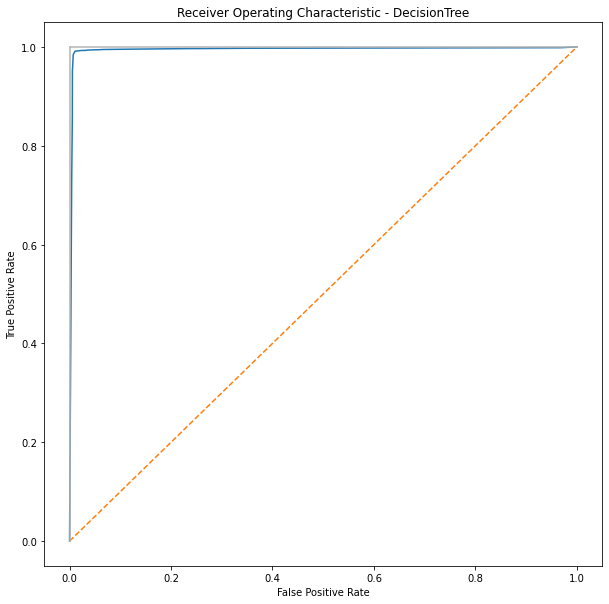

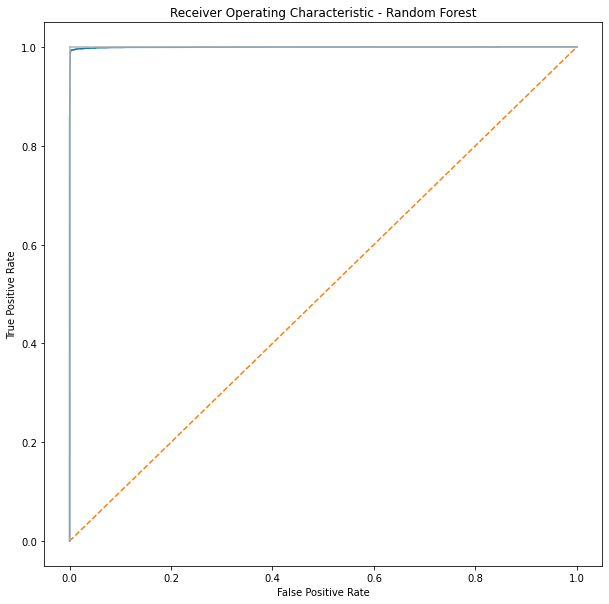

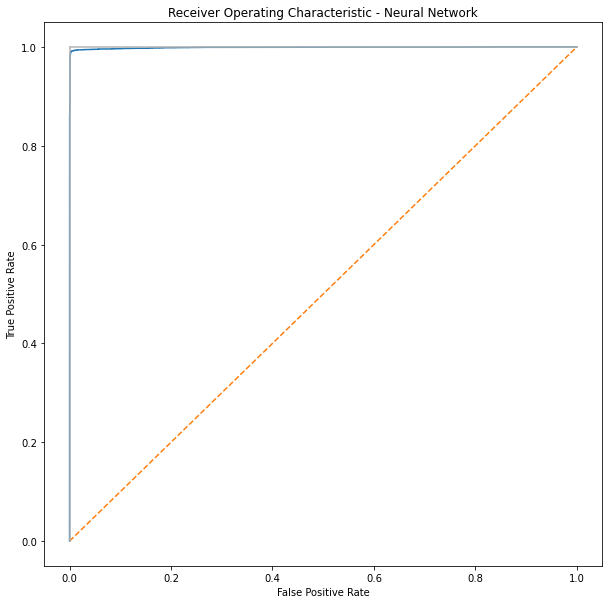

In [8]:
#Running the Second Hyper parameters tunes

#Training on new X which is full text plus title 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_tree_2 = DecisionTreeClassifier(max_depth=9, max_features=16)
clf_rf_2 = RandomForestClassifier(max_depth=11, max_features=7, n_estimators=46)
clf_nn_2 = MLPClassifier(hidden_layer_sizes=7, learning_rate='adaptive')

clf_tree_2.fit(X_train, y_train)
clf_rf_2.fit(X_train, y_train)
clf_nn_2.fit(X_train, y_train)

y_score1 = clf_tree_2.predict_proba(X_test)[:,1]
y_score2 = clf_rf_2.predict_proba(X_test)[:,1]
y_score3 = clf_nn_2.predict_proba(X_test)[:,1]
    
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Neural Network: ', roc_auc_score(y_test, y_score3))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Neural Network')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

4) Above is the text column added to the features. It dramatically improves performance and the AUC. I believe this information gives the models a lot more data to work with especially since the titles do not contain a lot of information on their own. The ML models are able to work with more relevant datasets instead of just titles.